In [1]:
import os, sys

__file__ = '/Users/justin/SynologyDrive/Learning Materials/School/Grad School/CSE 6140 Algorithms/Project/CSE6140-TSP-Project/Archived Reports/Genetic Algorithm QRTD.ipynb'
sys.path.append(os.path.dirname(os.path.dirname(os.path.realpath(__file__))))

In [63]:
import Algorithms.two_opt as ga
import utilities as u
import tracer as t

In [4]:
import datetime as dt

# Champaign, 52643
instance_name, tsp_data = u.load_data('../DATA/Berlin.tsp')
optimal = 7542

In [64]:
import numpy as np
candidate_quality = np.linspace(1.2, 2, 6)
results = {}
for q in candidate_quality:
    results[q] = {}
    for runtime in np.linspace(0.1, 0.5, 10):
        results[q][runtime] = []
        for i in range(10):
            print(q, runtime, i)
            score, solution = ga.solve(data=tsp_data, 
                                       timer=u.early_stop_checker(seconds=runtime, target_cost=q * optimal),
                                       tracer=t.NullTracer())
            results[q][runtime].append(score)

1.2 0.1 0
1.2 0.1 1
1.2 0.1 2
1.2 0.1 3
1.2 0.1 4
1.2 0.1 5
1.2 0.1 6
1.2 0.1 7
1.2 0.1 8
1.2 0.1 9
1.2 0.14444444444444446 0
1.2 0.14444444444444446 1
1.2 0.14444444444444446 2
1.2 0.14444444444444446 3
1.2 0.14444444444444446 4
1.2 0.14444444444444446 5
1.2 0.14444444444444446 6
1.2 0.14444444444444446 7
1.2 0.14444444444444446 8
1.2 0.14444444444444446 9
1.2 0.18888888888888888 0
1.2 0.18888888888888888 1
1.2 0.18888888888888888 2
1.2 0.18888888888888888 3
1.2 0.18888888888888888 4
1.2 0.18888888888888888 5
1.2 0.18888888888888888 6
1.2 0.18888888888888888 7
1.2 0.18888888888888888 8
1.2 0.18888888888888888 9
1.2 0.23333333333333334 0
1.2 0.23333333333333334 1
1.2 0.23333333333333334 2
1.2 0.23333333333333334 3
1.2 0.23333333333333334 4
1.2 0.23333333333333334 5
1.2 0.23333333333333334 6
1.2 0.23333333333333334 7
1.2 0.23333333333333334 8
1.2 0.23333333333333334 9
1.2 0.2777777777777778 0
1.2 0.2777777777777778 1
1.2 0.2777777777777778 2
1.2 0.2777777777777778 3
1.2 0.27777777777777

In [71]:
np.linspace(1.2, 2, 6)

array([1.2 , 1.36, 1.52, 1.68, 1.84, 2.  ])

In [66]:
first_runtime = results[1.2]

In [67]:
first_runtime

{0.1: [18098.09844681325,
  16017.873809647805,
  17784.25872008906,
  15876.352998945431,
  17053.135897257976,
  17691.794643264762,
  16110.39697604019,
  16326.202119200969,
  16182.851555448324,
  16555.615125361364],
 0.14444444444444446: [14388.954778647396,
  14592.911355981629,
  14866.15266166804,
  14515.141940859035,
  14532.917702309658,
  14478.662414116456,
  15165.466741797498,
  14920.798946666453,
  15298.316011888293,
  15106.54760098011],
 0.18888888888888888: [14554.711038591053,
  16204.278923407273,
  14143.734371448696,
  14960.552815370515,
  14960.552815370515,
  15869.927577124054,
  16525.471117834946,
  14960.799058527002,
  14006.372721396556,
  14262.722234808],
 0.23333333333333334: [13109.71276055651,
  13727.93364124188,
  13192.189786658348,
  13118.700288139255,
  13295.118081416775,
  14756.794680724215,
  13348.389074668281,
  13192.189786658348,
  13662.588945898204,
  15101.902670899657],
 0.2777777777777778: [14423.281647621834,
  13390.95250609

In [68]:
key_set = []
time_set = []
for key, times in first_runtime.items():
    key_set.append(key)
    time_set.append(times)

In [69]:
key_set

[0.1,
 0.14444444444444446,
 0.18888888888888888,
 0.23333333333333334,
 0.2777777777777778,
 0.32222222222222224,
 0.3666666666666667,
 0.4111111111111111,
 0.4555555555555556,
 0.5]

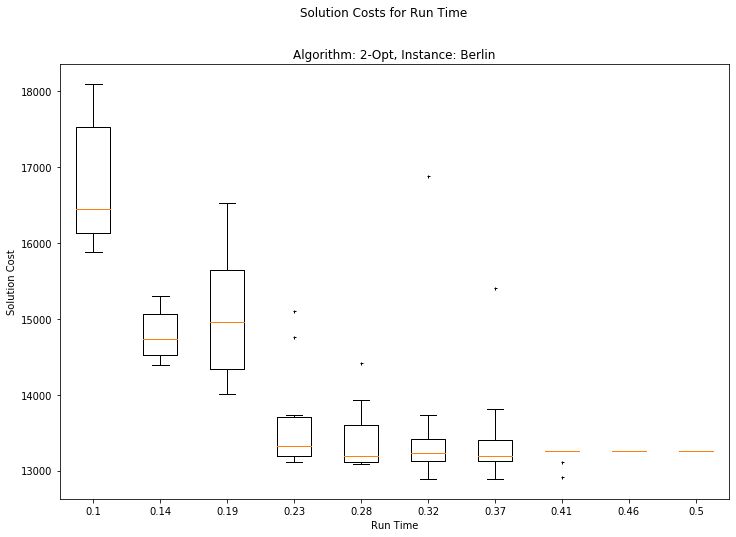

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline


fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(8)
pos = np.array(range(len(time_set))) + 1
bp = ax.boxplot(time_set, 
                sym='k+', 
                labels=list(map(lambda x: round(x,2), key_set)),
                positions=pos)

ax.set_xlabel('Run Time')
ax.set_ylabel('Solution Cost')
plt.setp(bp['whiskers'], color='k', linestyle='-')
plt.setp(bp['fliers'], markersize=3.0)
plt.suptitle('Solution Costs for Run Time')
plt.title('Algorithm: 2-Opt, Instance: Berlin')
plt.show()

In [33]:
tracer = t.MultiRunTracer()

for _ in range(100):
    print(_)
    score, _ = ga.solve(data=tsp_data, 
                             timer=u.early_stop_checker(seconds=1, target_cost=optimal), 
                             tracer=tracer)
    tracer.next_run()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [34]:
def convert_run_to_relative_run(runs, optimal):
    relative_runs = []
    for run in runs:
        initial_time = run[0][0]
        relative_run = [((timestamp - initial_time).total_seconds(), score / optimal) for timestamp, score in run]
        relative_runs.append(relative_run)
    return relative_runs

def run_hits_quality_in_time(run,q,t):
    for elapsed_time, relative_score in run:
        if relative_score < q and elapsed_time <= t:
            return 1
    return 0

def probability_to_solve_in_limited_time(runs, q, t):
    counts = sum(run_hits_quality_in_time(run, q, t) for run in runs)
    return counts / len(runs)
        

In [35]:
relative_runs = convert_run_to_relative_run(tracer._runs, optimal=optimal)

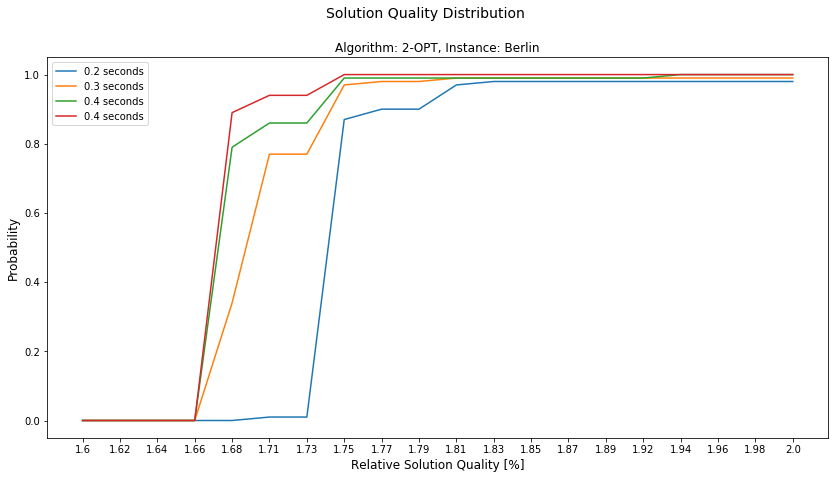

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,7))
plt.suptitle('Solution Quality Distribution', size=14)
plt.title('Algorithm: 2-OPT, Instance: Berlin')
plt.ylabel('Probability', size=12)
plt.xlabel('Relative Solution Quality [%]', size=12)
qualities = np.linspace(1.6,2,20)
plt.xticks(list(range(len(qualities))), list(map(lambda x: round(x, 2), qualities)), rotation='horizontal')

for t_ in np.linspace(0.25, 0.4, 4):
    line_data = [probability_to_solve_in_limited_time(relative_runs, q, t=t_) for q in qualities]
    plt.plot(line_data, label=f'{(round(t, 1))} seconds')
plt.legend();

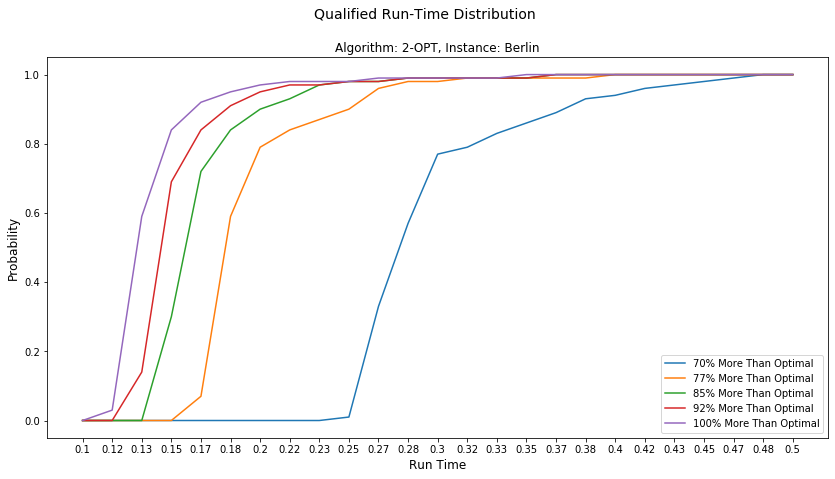

In [88]:
# QTRD Plots
# Given a number of seconds
#   and a vector of qualities

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,7))
plt.suptitle('Qualified Run-Time Distribution', size=14)
plt.title('Algorithm: 2-OPT, Instance: Berlin')
plt.ylabel('Probability', size=12)
plt.xlabel('Run Time', size=12)
times = np.linspace(0.1,0.5,25)
plt.xticks(list(range(len(times))), list(map(lambda x: round(x, 2), times)), rotation='horizontal')

for q in np.linspace(1.7,2,5):
    line_data = [probability_to_solve_in_limited_time(relative_runs, q, t=t) for t in times]
    plt.plot(line_data, label=f'{int(round((q-1)*100,0))}% More Than Optimal');
plt.legend();

In [92]:
import numpy as np

def find_solutions_of_minimum_quality(q):
    runtimes = np.linspace(1, 20, 20)
    results = []
    iteration_count = 15
    for runtime in runtimes:
        total_sum = 0
        for i in range(iteration_count):
            print(q, runtime, i)
            score, solution = ga.solve(data=tsp_data, 
                                         timer=u.early_stop_checker(seconds=runtime, target_cost=q * optimal), 
                                         tracer=t.InMemoryTracer())
            total_sum += 1 if (score / optimal) < q else 0
        results.append(total_sum / iteration_count)
    return results

In [93]:
run_results = [find_solutions_of_minimum_quality(q) for q in [1.0625, 1.125, 1.25]

1.5 1.0 0
1.5 1.0 1
1.5 1.0 2
1.5 1.0 3
1.5 1.0 4
1.5 1.0 5
1.5 1.0 6
1.5 1.0 7
1.5 1.0 8
1.5 1.0 9
1.5 1.0 10
1.5 1.0 11
1.5 1.0 12
1.5 1.0 13
1.5 1.0 14
1.5 2.0 0
1.5 2.0 1
1.5 2.0 2
1.5 2.0 3
1.5 2.0 4
1.5 2.0 5
1.5 2.0 6
1.5 2.0 7
1.5 2.0 8
1.5 2.0 9
1.5 2.0 10
1.5 2.0 11
1.5 2.0 12
1.5 2.0 13
1.5 2.0 14
1.5 3.0 0
1.5 3.0 1
1.5 3.0 2
1.5 3.0 3
1.5 3.0 4
1.5 3.0 5
1.5 3.0 6
1.5 3.0 7
1.5 3.0 8
1.5 3.0 9
1.5 3.0 10
1.5 3.0 11
1.5 3.0 12
1.5 3.0 13
1.5 3.0 14
1.5 4.0 0
1.5 4.0 1
1.5 4.0 2
1.5 4.0 3
1.5 4.0 4
1.5 4.0 5
1.5 4.0 6
1.5 4.0 7
1.5 4.0 8
1.5 4.0 9
1.5 4.0 10
1.5 4.0 11
1.5 4.0 12
1.5 4.0 13
1.5 4.0 14
1.5 5.0 0
1.5 5.0 1
1.5 5.0 2
1.5 5.0 3
1.5 5.0 4
1.5 5.0 5
1.5 5.0 6
1.5 5.0 7
1.5 5.0 8
1.5 5.0 9
1.5 5.0 10
1.5 5.0 11
1.5 5.0 12
1.5 5.0 13
1.5 5.0 14
1.5 6.0 0
1.5 6.0 1
1.5 6.0 2
1.5 6.0 3
1.5 6.0 4
1.5 6.0 5
1.5 6.0 6
1.5 6.0 7
1.5 6.0 8
1.5 6.0 9
1.5 6.0 10
1.5 6.0 11
1.5 6.0 12
1.5 6.0 13
1.5 6.0 14
1.5 7.0 0
1.5 7.0 1
1.5 7.0 2
1.5 7.0 3
1.5 7.0 4
1.5 7.0 5
1.5 7.0 6


In [ ]:
{1.5:[0.0,
 0.0,
 0.0,
 0.0,
 0.06666666666666667,
 0.13333333333333333,
 0.6666666666666666,
 0.8666666666666667,
 0.9333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]}

In [86]:
candidate_runtimes

array([1.1 , 1.28, 1.46, 1.64, 1.82, 2.  ])

In [94]:
run_results


[0.0,
 0.0,
 0.0,
 0.0,
 0.06666666666666667,
 0.13333333333333333,
 0.6666666666666666,
 0.8666666666666667,
 0.9333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline



In [84]:
#given a quality 
q = 
# Find percent of solutions at each run time where a solution was found.
run_time_percentages = []

for runtime, costs in first_runtime.items():
    percent_solved = (np.array(costs) <= q * optimal).sum() / len(costs)
    run_time_percentages.append(percent_solved)
run_time_percentages

SyntaxError: invalid syntax (<ipython-input-84-9c9daf434008>, line 2)

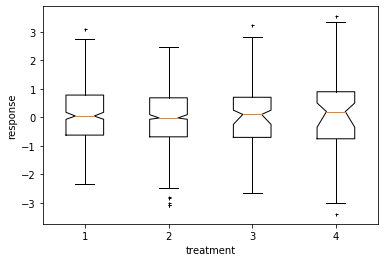

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

inc = 0.1
e1 = np.random.normal(0, 1, size=500)
e2 = np.random.normal(0, 1, size=500)
e3 = np.random.normal(0, 1 + inc, size=500)
e4 = np.random.normal(0, 1 + 2*inc, size=500)

treatments = [e1, e2, e3, e4]
med1, CI1 = (0.1, (-0.25, 0.25))
med2, CI2 = (0.2, (-0.35, 0.50))
medians = [None, None, med1, med2]
conf_intervals = [None, None, CI1, CI2]

fig, ax = plt.subplots()
pos = np.array(range(len(treatments))) + 1
bp = ax.boxplot(treatments, sym='k+', positions=pos,
                notch=1, bootstrap=5000,
                usermedians=medians,
                conf_intervals=conf_intervals)

ax.set_xlabel('treatment')
ax.set_ylabel('response')
plt.setp(bp['whiskers'], color='k', linestyle='-')
plt.setp(bp['fliers'], markersize=3.0)
plt.show()

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

inc = 0.1
e1 = np.random.normal(0, 1, size=500)
e2 = np.random.normal(0, 1, size=500)
e3 = np.random.normal(0, 1 + inc, size=500)
e4 = np.random.normal(0, 1 + 2*inc, size=500)

treatments = [e1, e2, e3, e4]
med1, CI1 = (0.1, (-0.25, 0.25))
med2, CI2 = (0.2, (-0.35, 0.50))
medians = [None, None, med1, med2]
conf_intervals = [None, None, CI1, CI2]

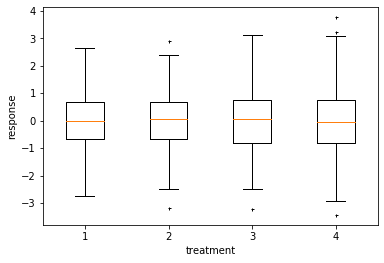

In [38]:
fig, ax = plt.subplots()
pos = np.array(range(len(treatments))) + 1
bp = ax.boxplot(treatments, 
                sym='k+', 
                positions=pos)

ax.set_xlabel('treatment')
ax.set_ylabel('response')
plt.setp(bp['whiskers'], color='k', linestyle='-')
plt.setp(bp['fliers'], markersize=3.0)
plt.show()